In [54]:
# dataset
import pandas as pd
import numpy as np
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth', None)

pd.options.mode.copy_on_write = True




In [55]:
import numpy as np
import pandas as pd


def tweak_data(data):
	return (data
			.rename(columns= {'Seq.': 'seq'}) 
			.rename(columns= {k: v.replace(' ', '_') for k, v in  
				{'Political party': 'party',
				'Bg': 'Background',
				'Im': 'Imagination',
				'Int': 'Integrity',
				'IQ': 'Intelligence',
				'L': 'Luck',
				'WR': 'Willing to take risks',
				'AC': 'Ability to compromise',
				'EAb': 'Executive ability',
				'LA': 'Leadership ability',
				'CAb': 'Communication ability',
				'OA': 'Overall ability',
				'PL': 'Party leadership',
				'RC': 'Relations with Congress',
				'CAp': 'Court appointments',
				'HE': 'Handling of economy',
				'EAp': 'Executive appointments',
				'DA': 'Domestic accomplishments',
				'FPA': 'Foreign policy accomplishments',
				'AM': 'Avoid crucial mistakes',
				'EV': "Experts’ view",
				'O': 'Overall'}.items()
				})
			# passing function .lower itself to rename(cplumns=...)
			# tells python to apply str.lower to each col name	
			# Use str.lower (without parentheses) when passing it as an argument to functions 
			# like map(), rename(), or apply().								
			.pipe(lambda df_: df_.rename(columns= str.lower))
			.assign(party = lambda df_: df_.party	
											.str.replace('-', ' ')
											.str.replace(r'\[.*\]', '', regex=True)
											.str.lower()
											.astype('category'),
					seq = lambda df_: df_.seq.astype('int'),
					average_rank = lambda df_: df_
											.select_dtypes('int64')
											.sum(axis='columns')   
											.rank(method='dense') 
											.astype('int'),  
					quartile= lambda df_: pd.qcut(df_.average_rank, 4, 
											 labels='1st,2nd,3rd,4th'.split(','))
												# labels=['1st', '2nd', '3rd', '4th'])
										
										)
			.sort_values('seq')
		#	.pipe(lambda df_: df_.astype({col: 'uint8[pyarrow]' for col in df_.select_dtypes('int64')}))
			# same result
			#.pipe(lambda df_: df_.astype({col: 'uint8[pyarrow]' for col in df_.select_dtypes('int64').columns}))
		)


url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'
raw = pd.read_html(url)
data = raw[3]

data = data.to_csv(r'C:\Users\fengz\Downloads\data.csv')
df = pd.read_csv(r'C:\Users\fengz\Downloads\data.csv', index_col=0)

# update value by locating the index and column
df.iloc[21, 0] = 22 
# add a new row by copy from an existing row
df.loc[len(df)] = df.iloc[21]
# update value by locating the index and column
df.iloc[-1:, 0] = 24



# load the tweak func
df = tweak_data(df)



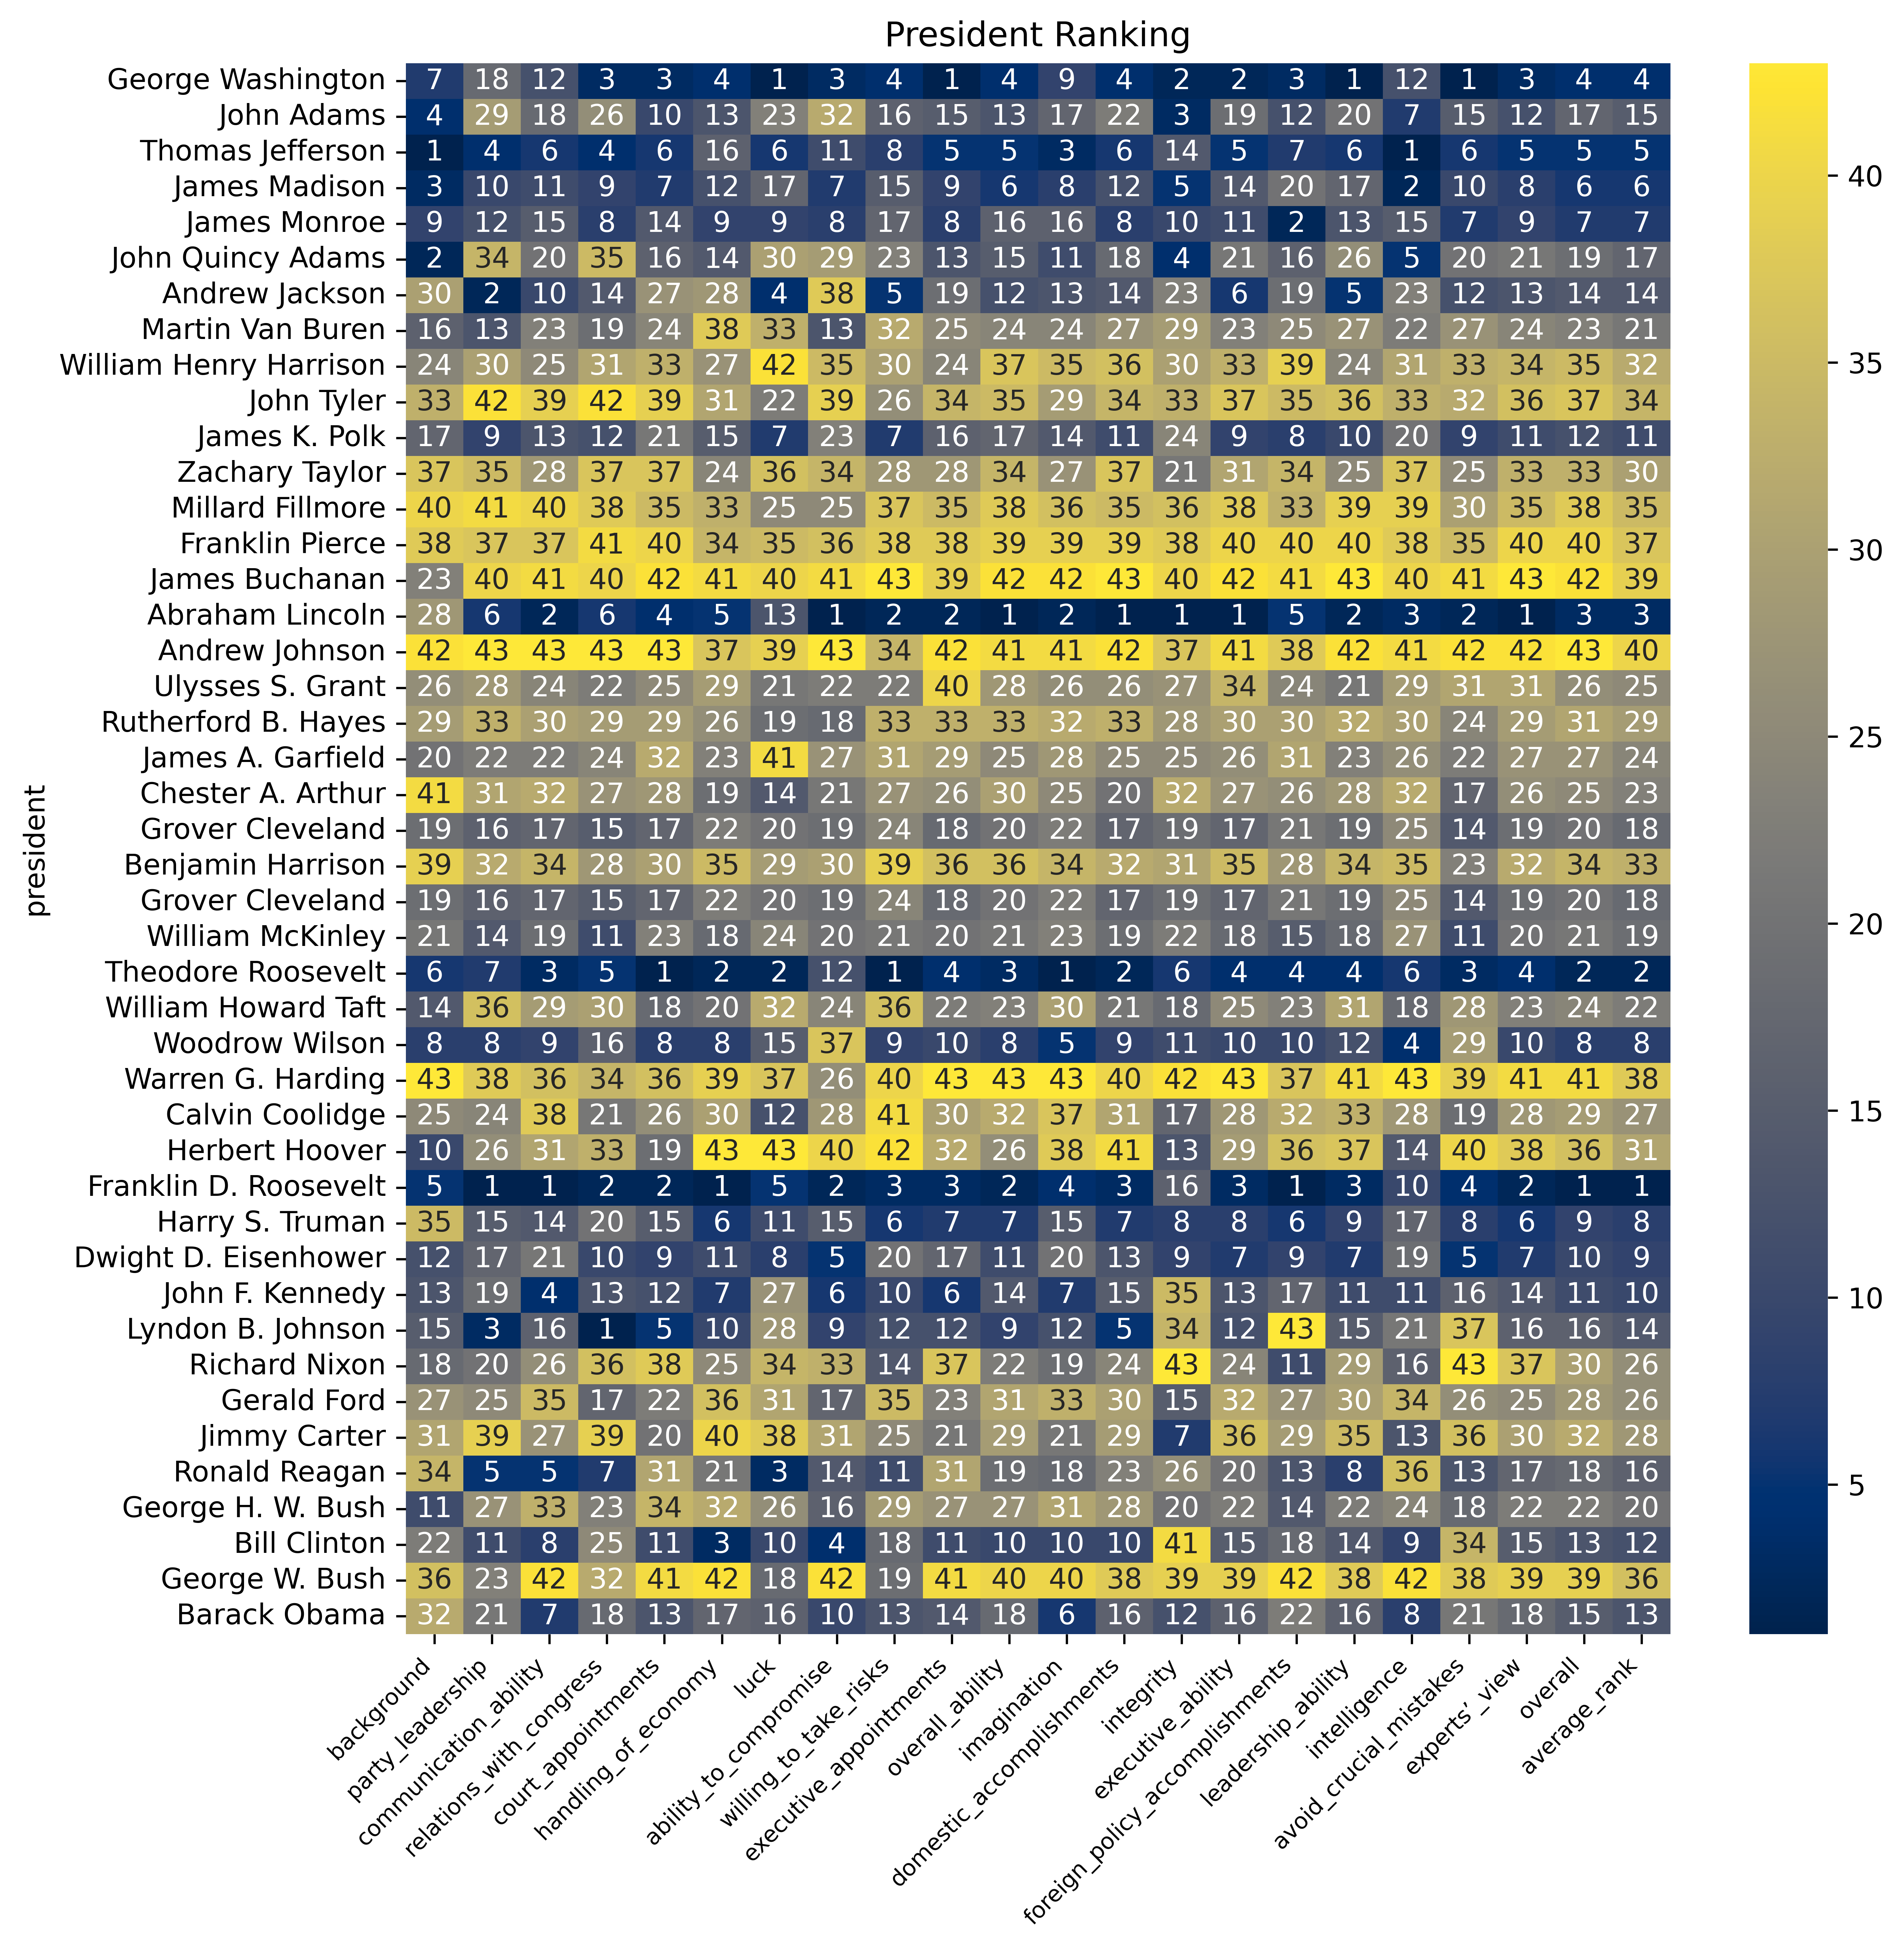

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10, 10), dpi=600)

g = sns.heatmap(tweak_data(df)
   .set_index('president')
   .loc[:, 'background': 'average_rank'],
        annot= True, ax = ax, cmap = 'cividis')

g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize=8, ha='right')

# _=plt.title('President Ranking') # simpler and quicker for straghrforward plotting

ax.set_title('President Ranking')
# fig.suptitle('President Ranking')
""" 
	Jupyter Notebooks automatically render the plot without explicitly needing plt.show(), 
but it’s still fine to use it.
"""

plt.show() 

In [ ]:
pres = tweak_data(df)

pres.info()
pres.columns

(pres
	.select_dtypes('number')
	.agg(['count', 'size', 'sum', lambda col: col.loc[1]])

)

(pres
 	.agg({'luck':  ['count', 'size', 'max'],
         'overall': ['count', 'size', 'max']
	   
	   }))


(pres
 	.agg(intelligence_count=('intelligence', 'count'),
        intelligence_size=('intelligence', 'size')
	   )
    .reset_index()
    .rename(columns={'index': 'indicator'})
)


(pres
    .sort_values(by='president', key=lambda name_ser: name_ser
									 .str.split(' ').str[-1]
                              ,ignore_index=True)       
                                     
    .sort_index(axis=1)
    )



(pres
	.set_index('president')
    .rename(index=lambda x: f'{x.split(' ')[0][0]}. {' '.join(x.split(' ')[1:])}')
    .index
            
	
)


(pres
	.loc[(pres.party == 'republican')
          & (pres['average_rank'] < 3),
       #   ['seq', 'president', 'party']
		lambda df_: df_.columns[:3]
		  
		  ]
 

)


# (pres
# 	.query('(party == "republican") and (average_rank < 3)')
#     .loc[:, ['president','party','background','party_leadership']]
#    # .iloc[:, :5]
	
# )


In [44]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.copy_on_write = True

url = 'https://github.com/mattharrison/datasets/raw/master/data/2020-jetbrains-python-survey.csv'
survey = pd.read_csv(url)


# survey['company.size'].value_counts(dropna=False)
# survey['employment.status'].value_counts(dropna=False)
# survey['is.python.main'].value_counts(dropna=False)
# survey['team.size'].value_counts(dropna=False)
# survey['years.of.coding'].value_counts(dropna=False)
# survey['python.years'].value_counts(dropna=False)
# survey['python3.version.most'].value_counts(dropna=False)
# survey['use.python.most'].value_counts(dropna=False)

# survey['nps.main.ide'].value_counts(dropna=False)



C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\212940453.py:9: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv(url)


In [ ]:
# survey = (survey
# 	.rename(columns = lambda col: col.replace('.', '_'))
# 	.assign(are_you_datascientist = lambda df_: df_
# 								.are_you_datascientist                      
# 								.replace({'Yes': '1', 'No': '0', '':'0', 'Other': '0'})
# 								.astype('bool'),
                                
# 			use_python_most = lambda df_: df_
# 								.use_python_most
# 								.fillna('Unknown'),
                                
# 	 		python3_version_most = lambda df_: df_  
# 	 							.python3_version_most
# 	 							.str.replace('_', '.') #substring replace
# 								.str.extract(r'(\d+\.\d+)')
#                                 .fillna('Unknown')    
# 								.astype('category'),
                                
# 			python_years = lambda df_:df_
# 								.python_years  
#                                 .replace('Less than 1 year', '<1') 
# 								.str.extract(r'(<\d+|\d+\–\d+|\d+\+)')
#                                 .fillna('Unknown')    
# 								.astype('category'),
						         
# 			years_of_coding = lambda df_:df_
# 								.years_of_coding
# 								.replace('Less than 1 year', '<1')   
# 								.str.extract(r'(<\d+|\d+\–\d+|\d+\+)')
#                                 .fillna('Unknown')    
# 								.astype('category'),
	 
# 			is_python_main = lambda df_:df_ 
# 								.is_python_main
# 								.fillna('Unknown')    
# 								.astype('category'),
                                
# 			employment_status = lambda df_:df_ 
# 								.employment_status
# 								.fillna('Unknown')   
# 								.astype('category'),
                                
# 			company_size = lambda df_: df_
# 								.company_size
# 								.replace({'Just me': '1',
# 										'Not sure': 'Unknown',
# 										'More than 5,000': '5000+'
# 										})	
#                                 .str.replace(',', '')	
# 								.astype('category'),
                                
# 			team_size = lambda df_: df_
# 								.team_size
# 								.replace('More than 40 people', '40+')
# 								.str.extract(r'(\d+\+|\d+\-\d+)')
#                                 .fillna('Unknown')   
# 								.astype('category')
# 	 	)                     


# )




In [ ]:
# def combine_cols(data, substrings):
#     return {substring: 
# 					(data
# 						.filter(axis=1, like=substring)
# 						.where(data.isna(), '1')
# 						.fillna('0')
# 						.astype('int')
# 						.astype('bool')
# 						.idxmax(axis=1)
# 						.str.replace(substring, '') # categorical-like Series. ready for dummy cols
					
# 						) for substring in substrings
# 			}			


# substrings = [
# 		'job_role_', 
#         'other_lang_', 
#         'other_purposes_', 
#         'how_involved_',
# 		'web_frameworks_', 
#         'data_frameworks_', 
#         'other_frameworks_', 
#         'database_',
# 		'bigdata_', 
#         'ide_editor_', 
#         'configuration_management_', 
#         'ci_',
#         'cloud_platform_',
#         'isolate_environments_',
# 		'unittesting_',
#         'orm_',
#         'develop_for_cloud_',
#         'run_in_cloud_',
#         'python_version_upgrade_',
#         'devenv_os_'
    
# ]

# combined_results = combine_cols(survey, substrings)




# (survey
# 		.loc[:, ['age', 'are_you_datascientist', 'company_size',
# 					'country_live', 'employment_status',
# 					'first_learn_about_main_ide', 'how_often_use_main_ide',
# 					'ide_main', 'is_python_main', 'job_team', 'main_purposes',
# 					'missing_features_main_ide', 'nps_main_ide', 'python_years',
# 					'python3_version_most', 'several_projects', 'team_size',
# 					'use_python_most', 'years_of_coding']]
                    
# # 	.loc[:, ~survey.columns.str.contains('job_role', regex=True)]

#     .assign(job_role=combined_results['job_role_'],
#             other_lang=combined_results['other_lang_'],
#             other_purposes = combined_results['other_purposes_'],
#             how_involved = combined_results['how_involved_'],
#             web_frameworks = combined_results['web_frameworks_'],
#             data_frameworks = combined_results['data_frameworks_'],
#             other_frameworks = combined_results['other_frameworks_'],
# 			database = combined_results['database_'],
# 			bigdata = combined_results['bigdata_'],
# 			ide_editor = combined_results['ide_editor_'], 
# 			configuration_management = combined_results['configuration_management_'], 
# 			ci = combined_results['ci_'],
# 			cloud_platform = combined_results['cloud_platform_'],
# 			isolate_environments = combined_results['isolate_environments_'],
# 			unittesting	= combined_results['unittesting_'],
# 			orm	= combined_results['orm_'],
# 			develop_for_cloud = combined_results['develop_for_cloud_'],
# 			run_in_cloud = combined_results['run_in_cloud_'],
# 			python_version_upgrade = combined_results['python_version_upgrade_'],
# 			devenv_os = combined_results['devenv_os_']

# 	)


			
	
			
# )






In [45]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.copy_on_write = True


def tweak_survey(data, substrings=None):
	'''Cleans and transform survey data'''
    
	# feature transformation
	data = (data
				.rename(columns = lambda col: col.replace('.', '_')) 
				.replace('–', '-')
				.assign(are_you_datascientist = lambda df_: df_
											.are_you_datascientist 
											.fillna('Unknown')                     
											.replace({'Yes': '1', 'No': '0', 'Unknown': '0', 'Other': '0'})
											.astype('int')
											.astype('bool'),
											
						use_python_most = lambda df_: df_
											.use_python_most
											.fillna('Unknown'),
											
						python3_version_most = lambda df_: df_  
											.python3_version_most
											.str.replace('_', '.') #substring replace
											.str.extract(r'(\d+\.\d+)')
											.fillna('Unknown'),    
											#.astype('category'),
											
						python_years = lambda df_:df_
											.python_years  
											.replace('Less than 1 year', '<1') 
											.str.extract(r'(<\d+|\d+\-\d+|\d+\+)')
											.fillna('Unknown'),    
											# .astype('category'),
											
						years_of_coding = lambda df_:df_
											.years_of_coding
											.replace('Less than 1 year', '<1')   
											.str.extract(r'(<\d+|\d+\-\d+|\d+\+)')
											.fillna('Unknown'),    
											# .astype('category'),
				
						is_python_main = lambda df_:df_ 
											.is_python_main
											.fillna('Unknown'),    
						# 					.astype('category'),
											
						employment_status = lambda df_:df_ 
											.employment_status
											.fillna('Unknown'),   
						# 					.astype('category'),
											
						company_size = lambda df_: df_
											.company_size
											.replace({'Just me': '1',
													'Not sure': 'Unknown',
													'More than 5,000': '5000+'
													})	
											.str.replace(',', ''),	
											# .astype('category'),
											
						team_size = lambda df_: df_
											.team_size
											.replace('More than 40 people', '40+')
											.str.extract(r'(\d+\+|\d+\-\d+)')
											.fillna('Unknown'),   
											# .astype('category'),

						# taking the avg of the age range
						age = lambda df_: ((df_
												.age
												.fillna('Unknown')
												.replace('Unknown', '0')
												.str.extract(r'(\d+|\d+\-)') # extract the first number
												.astype('int'))
											.add((df_
												.age
												.fillna('Unknown')
												.replace('Unknown', '0')
												.str.extract(r'(\d+|\d+\-)(?!.*\d+)') # extract the last number
												.astype('int')))
											.div(2) 
											.astype('int')
											)



						)                     
			)		
	print(data['are_you_datascientist'].value_counts())


	# default substrings if not provided 
	if substrings is None:
		substrings = [
					'job_role', 
					'other_lang', 
					'other_purposes', 
					'how_involved',
					'web_frameworks', 
					'data_frameworks', 
					'other_frameworks', 
					'database',
					'bigdata', 
					'ide_editor', 
					'configuration_management', 
					'ci',
					'cloud_platform',
					'isolate_environments',
					'unittesting',
					'orm',
					'develop_for_cloud',
					'run_in_cloud',
					'python_version_upgrade',
					'devenv_os'
    				]
		
	# function to combine categorical cols based on substrings
	def combine_cols(data, substrings):
		"""transform categorical-like columns based on the given substrings"""

		transformed_cols = {}

		for substring in substrings:
			transformed_data = (data	
									.filter(axis=1, like=substring)
									.where(data.isna(), '1')
									.fillna('1')
									.astype('int')
									.astype('bool')
									.idxmax(axis=1)
								#	.str.replace(substring, '') # rename the columns 
								)
			
			transformed_cols[substring] = transformed_data

		return transformed_cols
	
	# generate transformed_cols
	transformed_cols = combine_cols(data, substrings)

	# apply transformed columns to the data
	data = data.assign(**transformed_cols)

	# select the relevant columns for the final output
	data = data.loc[:, ['age', 'are_you_datascientist', 'company_size',
						'country_live', 'employment_status',
						'first_learn_about_main_ide', 'how_often_use_main_ide',
						'ide_main', 'is_python_main', 'job_team', 'main_purposes',
						'missing_features_main_ide', 'nps_main_ide', 'python_years',
						'python3_version_most', 'several_projects', 'team_size',
						'use_python_most', 'years_of_coding',
						*transformed_cols.keys()]
				 	]
	
	return data

url = 'https://github.com/mattharrison/datasets/raw/master/data/2020-jetbrains-python-survey.csv'
survey = pd.read_csv(url)

#survey.shape
df = tweak_survey(survey, substrings=None)

# df['company_size'].value_counts(dropna=False)
# df['employment_status'].value_counts(dropna=False)
# df['is_python_main'].value_counts(dropna=False)
# df['team_size'].value_counts(dropna=False)

df.head()

C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\441327735.py:164: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv(url)


are_you_datascientist
False    47752
True      6710
Name: count, dtype: int64


C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\441327735.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = data.assign(**transformed_cols)
C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\441327735.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = data.assign(**transformed_cols)
C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\441327735.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

,age,are_you_datascientist,company_size,country_live,employment_status,first_learn_about_main_ide,how_often_use_main_ide,ide_main,is_python_main,job_team,main_purposes,missing_features_main_ide,nps_main_ide,python_years,python3_version_most,several_projects,team_size,use_python_most,years_of_coding,job_role,other_lang,other_purposes,how_involved,web_frameworks,data_frameworks,other_frameworks,database,bigdata,ide_editor,configuration_management,ci,cloud_platform,isolate_environments,unittesting,orm,develop_for_cloud,run_in_cloud,python_version_upgrade,devenv_os
0,34,False,1,NaN,Partially employed by a company / organization,Conference / User Group,Weekly,PyCharm Community Edition,Yes,Work as an external consultant or trainer,For work,"No, it has all the features I need",3.0,Unknown,3.7,"Yes, I work on many different projects",Unknown,Unknown,Unknown,job_role_DBA,other_lang_None,other_purposes_Educational purposes,how_involved_Computer graphics,web_frameworks_None,data_frameworks_None,other_frameworks_None,orm_No database development,bigdata_None,ide_editor_None,configuration_management_None,are_you_datascientist,cloud_platform_None,isolate_environments_None,unittesting_None,cloud_platform_None,develop_for_cloud_None of the following,run_in_cloud_None of the following,python_version_upgrade_I don’t update,devenv_os_Windows
1,25,True,5000+,India,Fully employed by a company / organization,School / University,Daily,VS Code,Yes,Work in a team,Both for work and personal,"No, it has all the features I need",8.0,Unknown,3.6,"Yes, I work on one main and several side projects",2-7,Software prototyping,Unknown,job_role_DBA,other_lang_None,other_purposes_Educational purposes,how_involved_Computer graphics,web_frameworks_None,data_frameworks_None,other_frameworks_None,orm_No database development,bigdata_None,ide_editor_None,configuration_management_None,are_you_datascientist,cloud_platform_None,isolate_environments_None,unittesting_None,cloud_platform_None,develop_for_cloud_None of the following,run_in_cloud_None of the following,python_version_upgrade_I don’t update,devenv_os_Windows
2,34,False,5000+,United States,Fully employed by a company / organization,Friend / Colleague,Daily,Vim,Yes,Work on your own project(s) independently,Both for work and personal,"No, it has all the features I need",10.0,Unknown,3.6,"Yes, I work on one main and several side projects",Unknown,DevOps / System administration / Writing automation scripts,Unknown,job_role_DBA,other_lang_None,other_purposes_Educational purposes,how_involved_Computer graphics,web_frameworks_None,data_frameworks_None,other_frameworks_None,orm_No database development,bigdata_None,ide_editor_None,configuration_management_None,are_you_datascientist,cloud_platform_None,isolate_environments_None,unittesting_None,cloud_platform_None,develop_for_cloud_None of the following,run_in_cloud_None of the following,python_version_upgrade_I don’t update,devenv_os_Windows
3,0,False,NaN,NaN,Unknown,Friend / Colleague,Daily,PyCharm Professional Edition,Yes,NaN,Both for work and personal,Yes – Please list:,10.0,11+,3.8,"Yes, I work on many different projects",Unknown,Web development,11+,job_role_DBA,other_lang_None,other_purposes_Educational purposes,how_involved_Computer graphics,web_frameworks_None,data_frameworks_None,other_frameworks_None,orm_No database development,bigdata_None,ide_editor_None,configuration_management_None,are_you_datascientist,cloud_platform_None,isolate_environments_None,unittesting_None,cloud_platform_None,develop_for_cloud_None of the following,run_in_cloud_None of the following,python_version_upgrade_I don’t update,devenv_os_Windows
4,25,False,NaN,Italy,Student,Search engines,Daily,VS Code,Yes,Work on your own project(s) independently,"For personal, educational or side projects","No, it has all the features I need",10.0,Unknown,3.8,"Yes, I work on one main and several side projects",Unknown,Web development,<1,job_role_DBA,other_lang_None,other_purposes_Educational purposes,how_in

In [ ]:
(df
	.groupby(['age', 'country_live'])
    .agg({'python3_version_most': 'size',
          'use_python_most': 'size'
		  })
    .loc[(slice(None), 'United States'), :] #have 2 cols
   
	
	)


(df
	.groupby(['age', 'country_live', 'python3_version_most','use_python_most']) # all indices
    .size()
    .unstack([-1, 2]) #unstack([a,b]) b -> level=0 in cols
    # .loc[(slice(None), ['United States', 'China'], slice(None), slice(None))]
    .loc[(slice(None), ['United States', 'China']), :] #have 2 cols
    .loc[(slice(None), 'United States'), :] #have 2 cols
)


(df
	.groupby(['age', 'country_live', 'python3_version_most','use_python_most']) # all indices
    .size()
    .unstack([-1, 2]) #unstack([a,b]) b -> level=0 in cols
    # .loc[:, (['Data analysis'])]
    .loc[(slice(None), ['United States', 'China']), (['Data analysis', 'Web development'])]
)


(df
	.groupby(['age', 'country_live', 'python3_version_most','use_python_most']) # all indices
    .size()
    .loc[(slice(None), ['United States', 'China'], '3.8', slice(None))]
)

(df
	.groupby(['age', 'country_live', 'python3_version_most','use_python_most'], observed=True) # all indices
    .size() # always return a single column of counts
    .unstack([-1, 2]) #unstack([a,b]) b -> level=-1 in cols
    # .loc[:, (['Data analysis'])]
    .loc[(slice(None), ['United States']), (['Data analysis', 'Web development'])]
    .swaplevel(axis=0)
	.style.format('{:.0f}').background_gradient(cmap='viridis', axis=None)
)



In [393]:
(df
	.groupby(['country_live', 'are_you_datascientist']
             ,observed=True)
    .size()
    .reset_index()
    .rename(columns={0: 'count'})
    # .unstack()
	# .query('are_you_datascientist == True')
    # .loc[lambda df_: df_['are_you_datascientist'] == True]
  

)

(df
 	.groupby(['country_live'])
    .agg(age_min=('age', 'min'),
         age_max=('age', 'max'))
)

(df
 	.pivot_table(index='country_live',
                 aggfunc={'age': [('age_min', 'min'),
                                  ('age_max', 'max')],
                          'are_you_datascientist': [('yes', 'sum')]
							
					})
  
	.stack()
    # # .stack()			  
	)

C:\Users\fengz\AppData\Local\Temp\ipykernel_16848\4017209326.py:28: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack()


age  are_you_datascientist
country_live                                             
Algeria              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   15.0
Argentina            age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   24.0
Armenia              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    3.0
Australia            age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   73.0
Austria              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   45.0
Bangladesh           age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   26.0
Belarus              age_max  54.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    8.0
Belgium              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   53.0
Brazil               age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                  168.0
Bulgaria             age_max  54.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   12.0
Canada               age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                  128.0
Chile                age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   17.0
China                age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                  169.0
Colombia             age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   36.0
Croatia              age_max  54.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    5.0
Czech Republic       age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   49.0
Denmark              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   51.0
Dominican Republic   age_max  54.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    2.0
Ecuador              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    9.0
Egypt                age_max  44.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   14.0
Estonia              age_max  54.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                    5.0
Finland              age_max  60.0                    NaN
                     age_min  19.0                    NaN
                     yes       NaN                   19.0
France               age_max  60.0                    NaN
                     age_min 

In [348]:
import io
data = '''name,age,test1,test2,teacher
Adam,15,95.0,80,Ashby
Bob,16,81.0,82,Ashby
Dave,16,89.0,84,Jones
Fred,15,,88,Jones'''

scores = pd.read_csv(io.StringIO(data))
scores


,name,age,test1,test2,teacher
0,Adam,15,95.0,80,Ashby
1,Bob,16,81.0,82,Ashby
2,Dave,16,89.0,84,Jones
3,Fred,15,NaN,88,Jones


In [359]:
(scores
	.groupby(['teacher', 'age'])
    .min()
    .unstack('teacher')
    # .unstack()
    
)

name       test1       test2      
teacher Ashby Jones Ashby Jones Ashby Jones
age                                        
15       Adam  Fred  95.0   NaN    80    88
16        Bob  Dave  81.0  89.0    82    84

In [205]:
scores_melted = (scores
 	.melt(id_vars=['name', 'age', 'teacher'],
         value_vars = ['test1', 'test2'],
         value_name='score',
         var_name='test'
	)
)    

scores_melted

,name,age,teacher,test,score
0,Adam,15,Ashby,test1,95.0
1,Bob,16,Ashby,test1,81.0
2,Dave,16,Jones,test1,89.0
3,Fred,15,Jones,test1,NaN
4,Adam,15,Ashby,test2,80.0
5,Bob,16,Ashby,test2,82.0
6,Dave,16,Jones,test2,84.0
7,Fred,15,Jones,test2,88.0


In [229]:
(scores_melted
	.pivot_table(index=['name', 'age', 'teacher'],
                 columns='test',
                 values='score')
    .reset_index()
    .rename_axis(None, axis=1) # rename/remove the name of the columns
    .rename(index={0: 'a'}, columns={'test1': 'test_a'})

  )


(scores_melted
	.groupby(['name', 'age', 'teacher', 'test'])
	.score
	.mean()
	.unstack()
    .reset_index()
    .rename_axis(None, axis=1)
)


,name,age,teacher,test1,test2
0,Adam,15,Ashby,95.0,80.0
1,Bob,16,Ashby,81.0,82.0
2,Dave,16,Jones,89.0,84.0
3,Fred,15,Jones,NaN,88.0


In [245]:
(scores
	.pivot_table(columns='teacher',
              	values=['test1', 'test2'])
	 .reset_index()
    # .columns
 
)


teacher,index,Ashby,Jones
0,test1,88.0,89.0
1,test2,81.0,86.0


In [269]:
(scores
	.melt(id_vars=['name', 'age', 'teacher'],
          value_vars = ['test1', 'test2'],
          var_name='test',
          value_name='score')
	# .pivot_table(index=['teacher', 'name', 'age'], columns='test', values='score')
    # .reset_index()
    
)

,name,age,teacher,test,score
0,Adam,15,Ashby,test1,95.0
1,Bob,16,Ashby,test1,81.0
2,Dave,16,Jones,test1,89.0
3,Fred,15,Jones,test1,NaN
4,Adam,15,Ashby,test2,80.0
5,Bob,16,Ashby,test2,82.0
6,Dave,16,Jones,test2,84.0
7,Fred,15,Jones,test2,88.0


In [31]:
df1 = pd.DataFrame({'name': ['John', 'George', 'Ringo'],
 'color': ['Blue', 'Blue', 'Purple']})

df2 = pd.DataFrame({'name': ['Paul', 'George', 'Ringo'],
 'carcolor': ['Red', 'Blue', pd.NA]},
index=[3, 1, 2])

print(df1)
print(df2)

# (df1
#  	.merge(df2.assign(
# 					 name=df2.Name)
# 	)
    
# )

(df1.merge(df2, how='outer',
            left_on='color', 
            right_on= 'carcolor', 
            suffixes=('_left', '_right'))
              

)


     name   color
0    John    Blue
1  George    Blue
2   Ringo  Purple
     name carcolor
3    Paul      Red
1  George     Blue
2   Ringo     <NA>


,name_left,color,name_right,carcolor
0,John,Blue,George,Blue
1,George,Blue,George,Blue
2,Ringo,Purple,NaN,NaN
3,NaN,NaN,Paul,Red
4,NaN,NaN,Ringo,<NA>


In [ ]:
import pandas as pd

pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth', None)

pd.options.mode.copy_on_write=True


url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'

df = (pd.read_csv(url, skiprows=34, sep='\t')
		.drop(index=0)
        .reset_index(drop=True)
        .rename(columns={'144166_00060': 'cfs',
						'144167_00065': 'gage_height'})
        # .assign(datetime=pd.to )



)
df.info()

C:\Users\fengz\AppData\Local\Temp\ipykernel_7920\2156441743.py:12: DtypeWarning: Columns (1,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = (pd.read_csv(url, skiprows=34, sep='\t')


AttributeError: module 'pandas' has no attribute 'to'